#### Iris Dataset :
It contains 3 classes (setosa, versicolor, virginica) of 50 instances each, where each class refers to a type of iris plant. 
One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. (This is exactly what we are going to see with the SVM model).


In [1]:
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
X = X[:,:2]

### Building Model

In [8]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

C = 0.01

In [9]:
svc = svm.SVC(C=0.01, kernel='linear').fit(X, y)

In [10]:
def plot_boundary(svc):
    
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    #plt.title('SVC with linear kernel')
    plt.show()

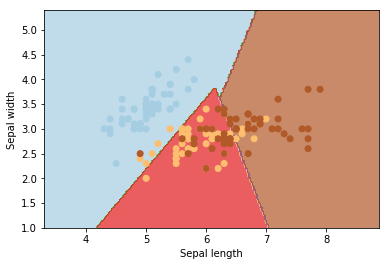

In [11]:
plot_boundary(svc)

Try different values of C    
C = 1

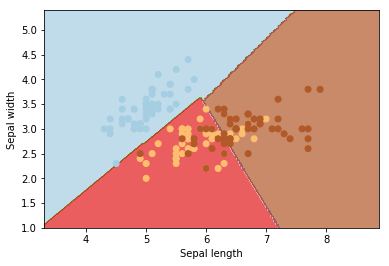

In [12]:
svc = svm.SVC(C=1, kernel='linear').fit(X,y)
plot_boundary(svc)

Using RBF Kernel

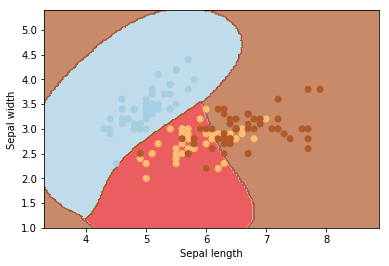

In [21]:
svc = svm.SVC(C=1, kernel='rbf', gamma=1).fit(X,y)
plot_boundary(svc)

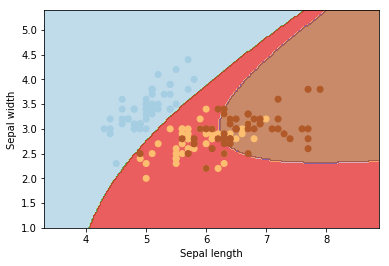

In [14]:
svc = svm.SVC(C=1, kernel='poly', degree=3, gamma=1).fit(X,y)
plot_boundary(svc)

#### As we can see with SVM we can create non-linear boundaries, as C increases the boundaries start to get more and more non-linear, but the model might get overfit.